In [5]:
import pandas as pd 

data = pd.read_csv("StressLevelDataset.csv")

## EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [7]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [8]:
data["stress_level"].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

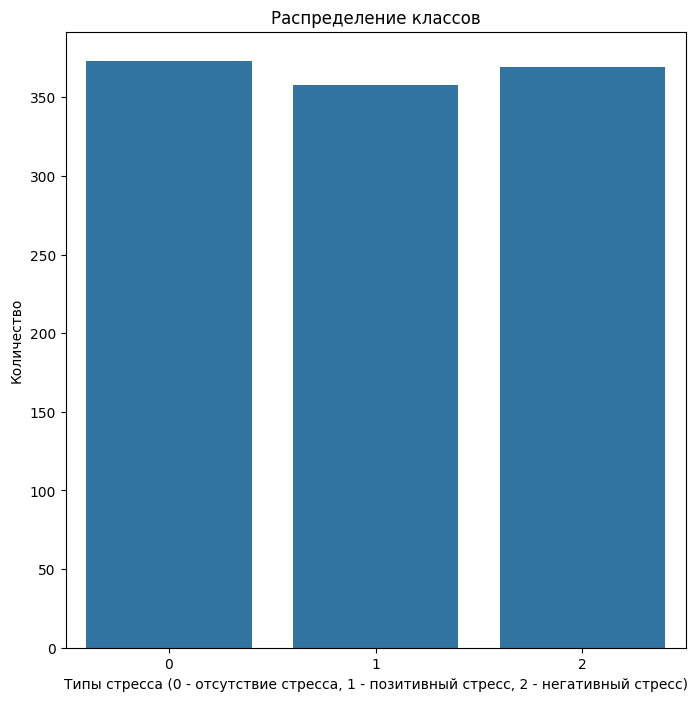

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[8,8])
sns.countplot(x='stress_level', data=data)
plt.title('Распределение классов')
plt.xlabel('Типы стресса (0 - отсутствие стресса, 1 - позитивный стресс, 2 - негативный стресс)')
plt.ylabel('Количество')
plt.show()

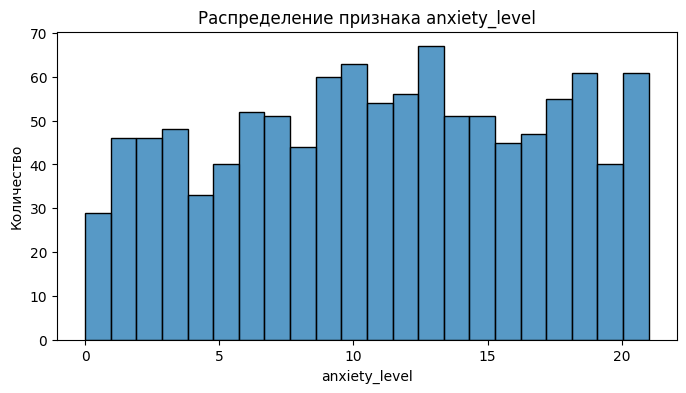

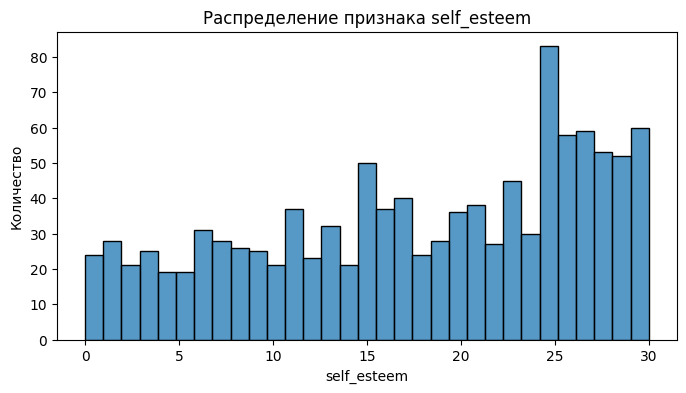

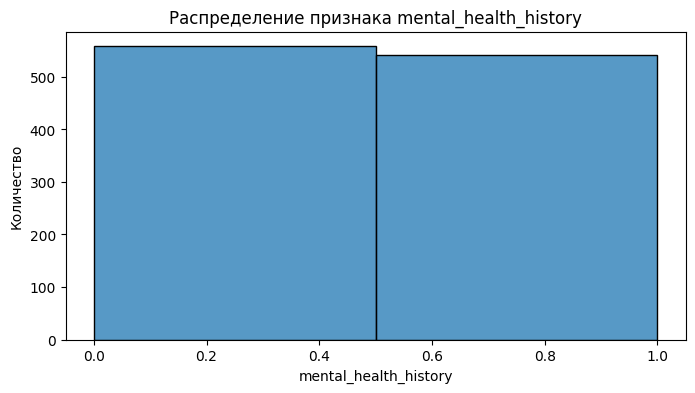

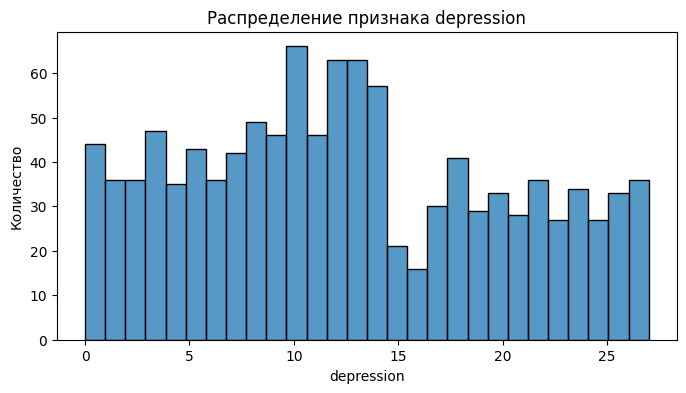

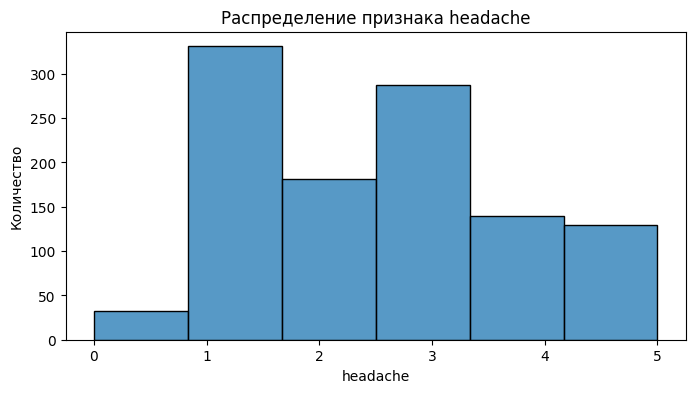

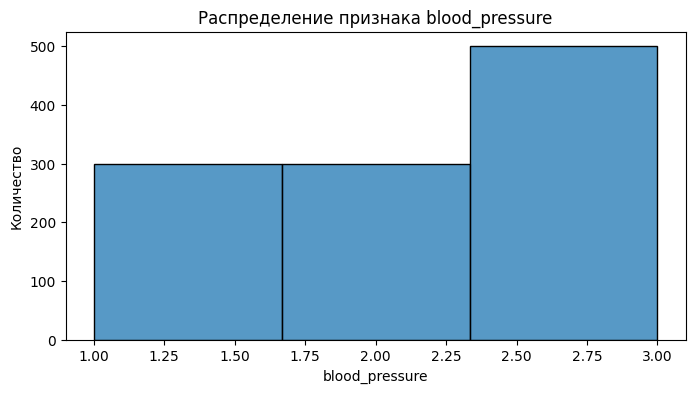

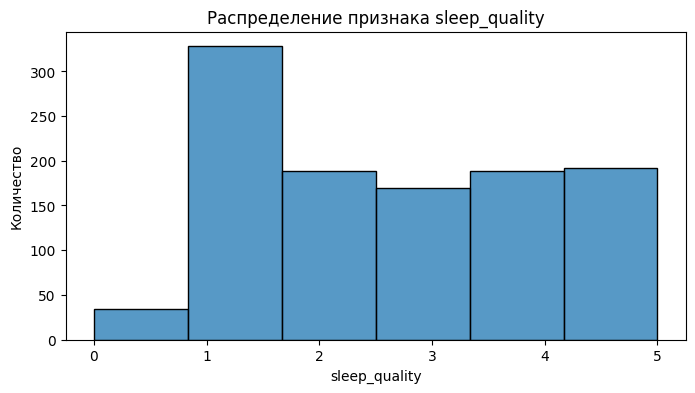

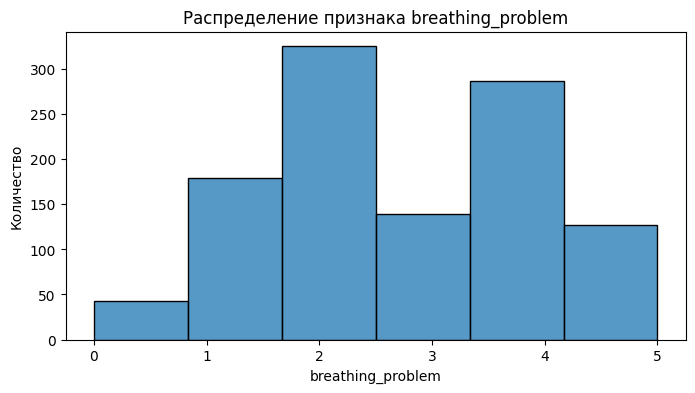

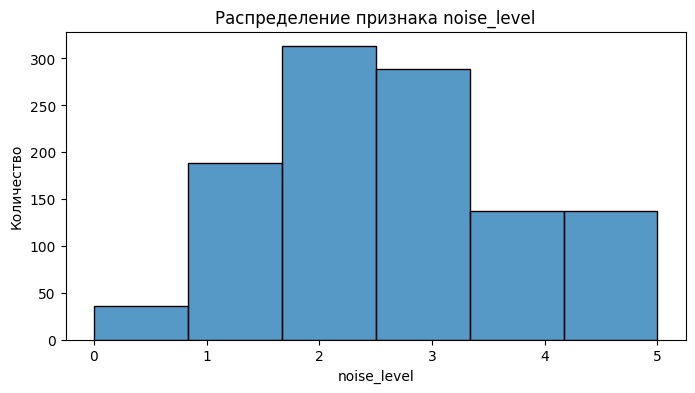

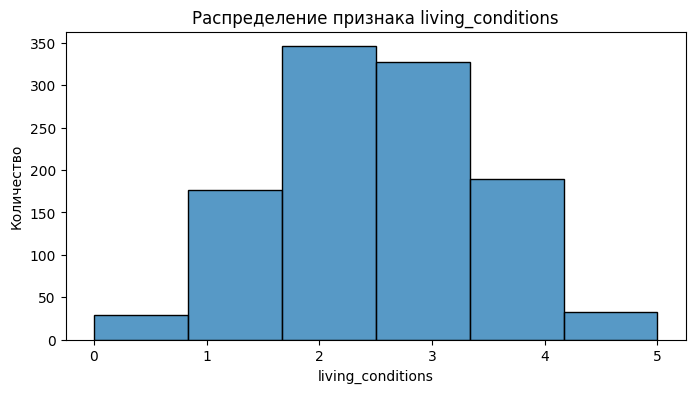

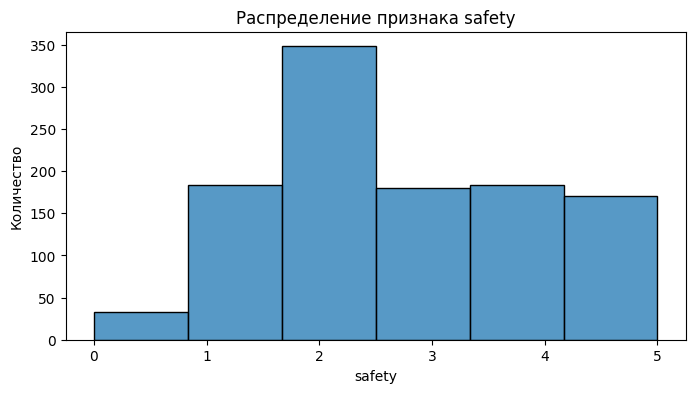

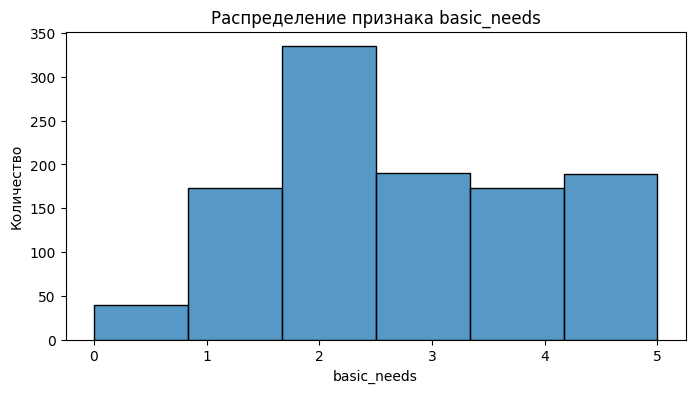

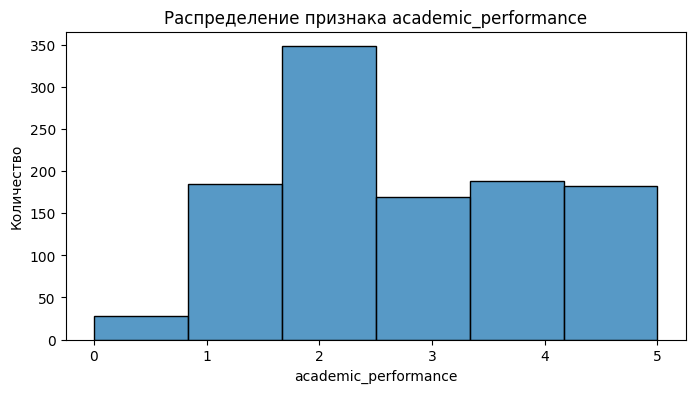

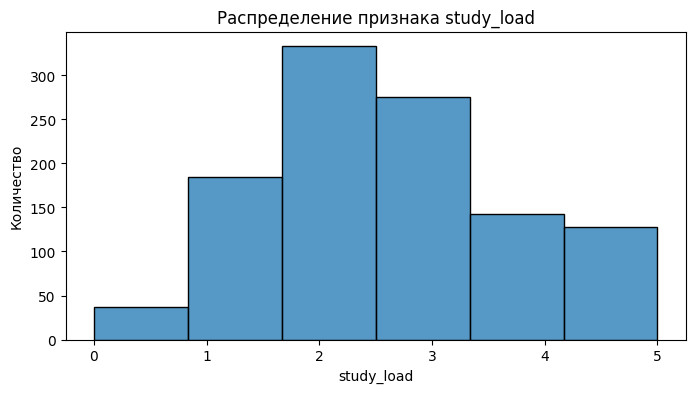

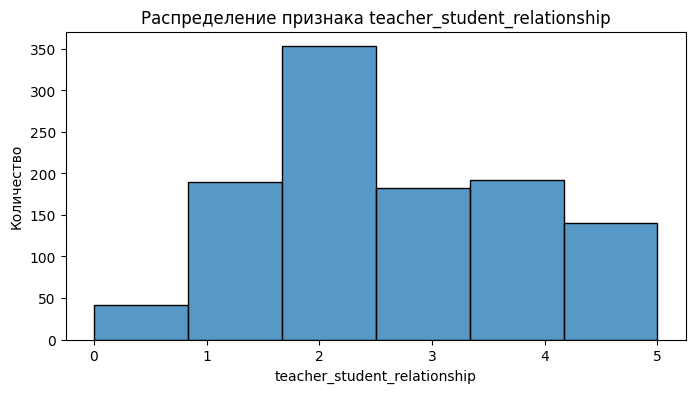

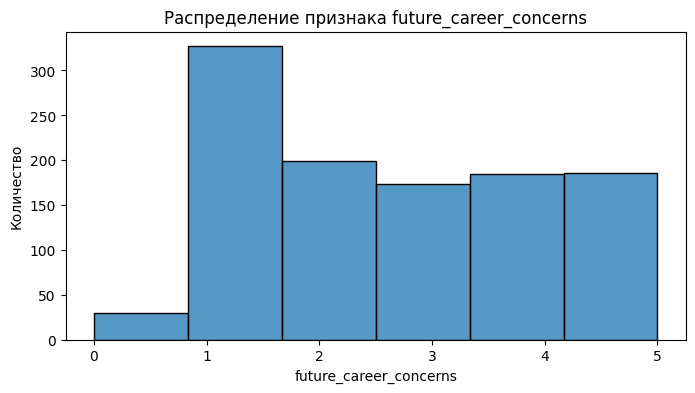

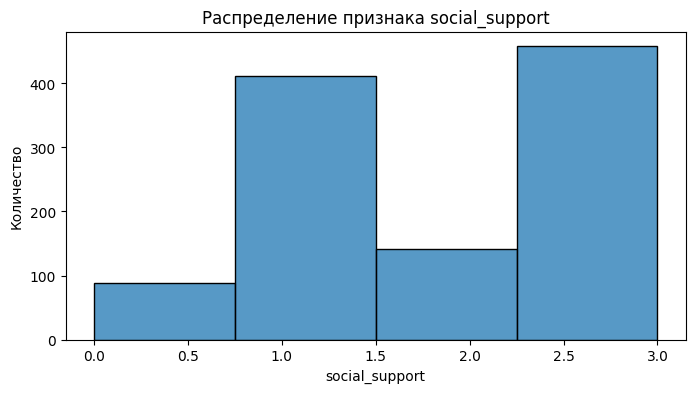

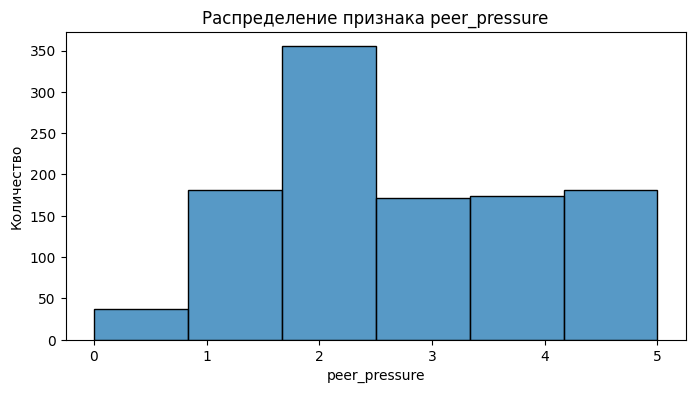

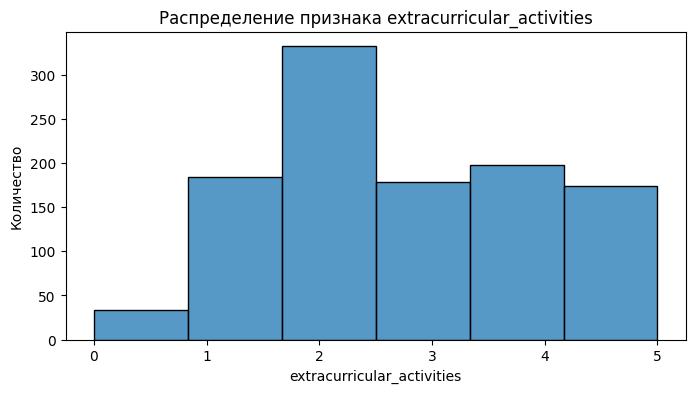

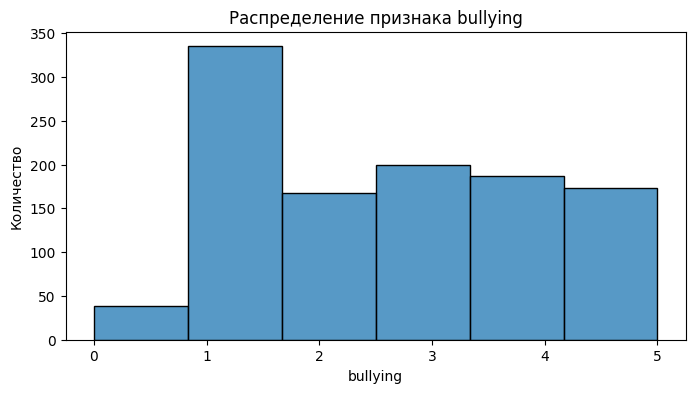

In [10]:
# Список признаков (исключая целевую переменную)
features = data.drop('stress_level', axis=1).columns

# Построение гистограмм для всех признаков
for feature in features:
    plt.figure(figsize=(8, 4))
    bins = int(data[feature].max() - data[feature].min() + 1)
    sns.histplot(data[feature], bins=bins)
    plt.title(f'Распределение признака {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.show()

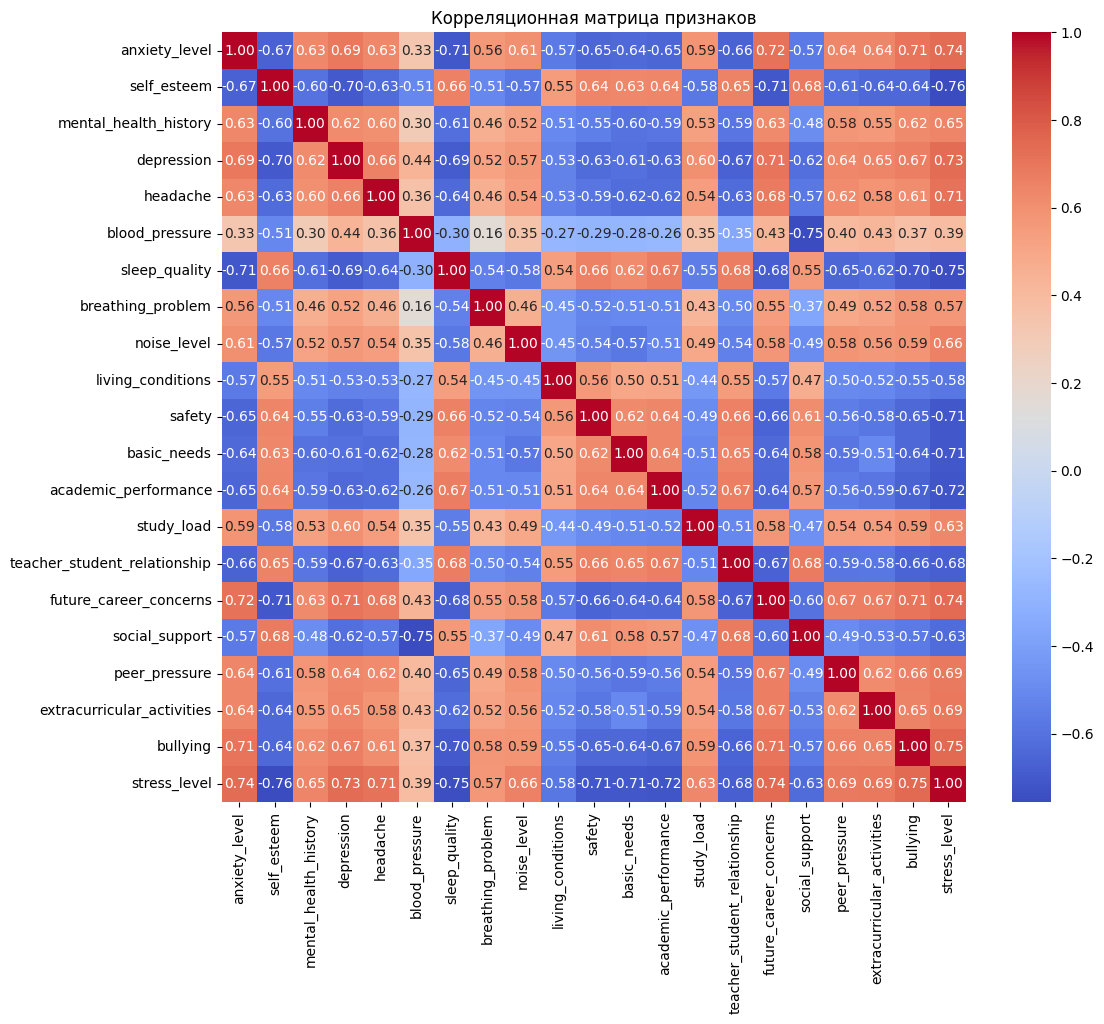

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

## Выбор и построение модели

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["stress_level"]), data["stress_level"], test_size=0.2, random_state=42)


### Подбор параметров

In [16]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logreg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
    }
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
    }
forest_params = {
    'n_estimators': np.arange(10, 100, 10),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
    }
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, n_jobs=-1, verbose=1)
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, n_jobs=-1, verbose=1)
forest_grid = GridSearchCV(RandomForestClassifier(), forest_params, cv=5, n_jobs=-1, verbose=1)

logreg_grid.fit(X_train, y_train)
tree_grid.fit(X_train, y_train)
forest_grid.fit(X_train, y_train)

print("Лучшие параметры для Logistic Regression:", logreg_grid.best_params_)
print("Лучшие параметры для Decision Tree:", tree_grid.best_params_)
print("Лучшие параметры для Random Forest:", forest_grid.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


KeyboardInterrupt: 

###  С применением нормализации

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
from sklearn.metrics import classification_report
logreg_model1 = LogisticRegression(C = 10, max_iter=200, solver='lbfgs', penalty='l2', random_state=42)
logreg_model1.fit(X_train_scaled, y_train)

y_pred_logreg1 = logreg_model1.predict(X_test)
print(classification_report(y_test, y_pred_logreg1))

              precision    recall  f1-score   support

           0       0.49      0.93      0.64        76
           1       0.00      0.00      0.00        73
           2       0.88      0.92      0.90        71

    accuracy                           0.62       220
   macro avg       0.45      0.62      0.51       220
weighted avg       0.45      0.62      0.51       220



c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metri

In [19]:
tree_model1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, random_state=42)
tree_model1.fit(X_train_scaled, y_train)
y_pred_tree1 = tree_model1.predict(X_test)
print(classification_report(y_test, y_pred_tree1))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        76
           1       1.00      0.01      0.03        73
           2       0.00      0.00      0.00        71

    accuracy                           0.35       220
   macro avg       0.45      0.34      0.18       220
weighted avg       0.45      0.35      0.19       220



c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\m

In [20]:
forest_model1 = RandomForestClassifier(criterion= 'gini', max_depth= 30, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 40, random_state=42)
forest_model1.fit(X_train_scaled, y_train)
y_pred_forest1 = forest_model1.predict(X_test)
print(classification_report(y_test, y_pred_forest1))

              precision    recall  f1-score   support

           0       0.35      0.95      0.51        76
           1       0.40      0.03      0.05        73
           2       0.29      0.03      0.05        71

    accuracy                           0.35       220
   macro avg       0.34      0.33      0.20       220
weighted avg       0.34      0.35      0.21       220



c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [21]:
from sklearn.model_selection import cross_val_predict
X = data.drop(columns=["stress_level"])
X_scaled = scaler.fit_transform(X)
y = data["stress_level"]
log_predict = cross_val_predict (logreg_model1, X_scaled, y, cv=5)
print(classification_report(y, log_predict))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       373
           1       0.90      0.87      0.89       358
           2       0.85      0.88      0.87       369

    accuracy                           0.88      1100
   macro avg       0.88      0.88      0.88      1100
weighted avg       0.88      0.88      0.88      1100



### Без нормализации

In [22]:
logreg_model2 = LogisticRegression(C = 10, max_iter=200, solver='lbfgs', penalty='l2', random_state=42)
logreg_model2.fit(X_train, y_train)

y_pred_logreg2 = logreg_model2.predict(X_test)
print(classification_report(y_test, y_pred_logreg2))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        76
           1       0.88      0.89      0.88        73
           2       0.90      0.92      0.91        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
tree_model2 = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, random_state=42)
tree_model2.fit(X_train, y_train)
y_pred_tree2 = tree_model2.predict(X_test)
print(classification_report(y_test, y_pred_tree2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        76
           1       0.86      0.90      0.88        73
           2       0.94      0.83      0.88        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



In [24]:
forest_model2 = RandomForestClassifier(criterion= 'gini', max_depth= 30, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 40, random_state=42)
forest_model2.fit(X_train, y_train)
y_pred_forest2 = forest_model2.predict(X_test)
print(classification_report(y_test, y_pred_forest2 ))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        76
           1       0.95      0.86      0.91        73
           2       0.85      0.90      0.88        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



In [25]:
X = data.drop(columns=["stress_level"])
y = data["stress_level"]
log_predict2 = cross_val_predict (logreg_model2, X, y, cv=5)
print(classification_report(y, log_predict2))

c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       373
           1       0.91      0.88      0.89       358
           2       0.85      0.88      0.87       369

    accuracy                           0.88      1100
   macro avg       0.88      0.88      0.88      1100
weighted avg       0.88      0.88      0.88      1100



c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Создание сравнительной таблицы
from sklearn.metrics import f1_score
f1_scores = {
    'Logistic Regression with StandardScaler': f1_score(y_test, y_pred_logreg1, average='macro'),
    'Logistic Regression ': f1_score(y_test, y_pred_logreg2, average='macro'),
    'Decision Tree with StandardScaler': f1_score(y_test, y_pred_tree1, average='macro'),
    'Decision Tree': f1_score(y_test, y_pred_tree2, average='macro'),
    'Random Forest with StandardScaler': f1_score(y_test, y_pred_forest1, average='macro'),
    'Random Forest': f1_score(y_test, y_pred_forest2, average='macro'),
    'Logistic Regression K-Fold with StandardScaler': f1_score(y, log_predict, average='macro'),
    'Logistic Regression K-Fold': f1_score(y, log_predict2, average='macro')
}

df_comparison = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1 Score (Macro)'])
print(df_comparison)


                                                F1 Score (Macro)
Logistic Regression with StandardScaler                 0.512064
Logistic Regression                                     0.891148
Decision Tree with StandardScaler                       0.180760
Decision Tree                                           0.877464
Random Forest with StandardScaler                       0.203202
Random Forest                                           0.886869
Logistic Regression K-Fold with StandardScaler          0.877461
Logistic Regression K-Fold                              0.881155


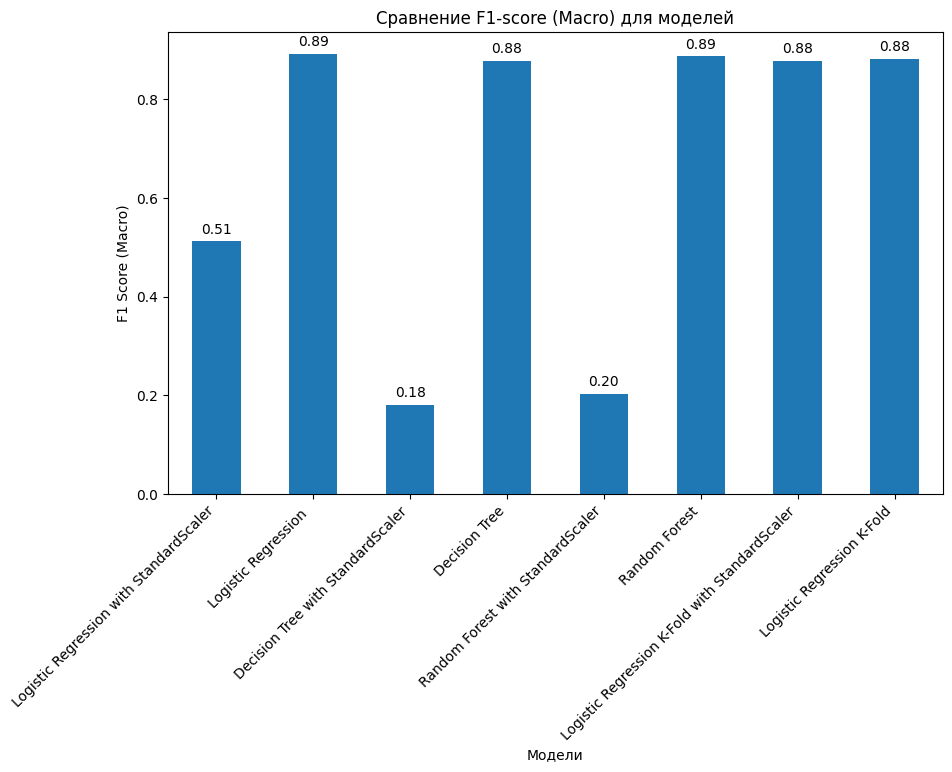

In [27]:
# Создание барчарта
plt.figure(figsize=(10, 6))
ax = df_comparison['F1 Score (Macro)'].plot(kind='bar')
plt.title('Сравнение F1-score (Macro) для моделей')
plt.xlabel('Модели')
plt.ylabel('F1 Score (Macro)')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(df_comparison['F1 Score (Macro)']):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [28]:

final_model = LogisticRegression(C = 10, max_iter=200, solver='lbfgs', penalty='l2', random_state=42)
final_predict = cross_val_predict (final_model, X, y, cv=5)
print(classification_report(y, final_predict))

c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       373
           1       0.91      0.88      0.89       358
           2       0.85      0.88      0.87       369

    accuracy                           0.88      1100
   macro avg       0.88      0.88      0.88      1100
weighted avg       0.88      0.88      0.88      1100



c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
final_model.fit(X, y)

c:\Users\moshk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=200, random_state=42)

In [31]:
import pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)